# Outlier Detection


**Step 1:** Generate a list of random numbers with outliers
- Random numbers are generated by first calculating inliers with parameters as 'median' and 'noise' across the numbers
- Upper and lower outliers are generated by adding another noise parameter 'outlier_noise'
- The above arrays are concatenated and shuffled

**Step 2:** Finding Outliers
- Outliers are found based on a threshold constant which is multiplied by Interquantile Range.
- Distribution Plot with upper and lower threshold is plotted as vertical lines, also we visualise the numbers using a box plot.
- We can also calculate zscore for each data point and find outliers by comparing it with a 'threshold' parameter.

In [15]:
import numpy as np
from numpy.random import shuffle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
class OutlierDetector:
    
    def __init__(self, random_numbers=None):
        self._random_numbers = random_numbers
        self._outliers = None
        self._lower = None
        self._upper = None
    
    def _generate_outliers(self, noise, outlier_noise, outliers_length, median):
        
        lower_outliers =  median - noise - outlier_noise * np.random.rand(outliers_length)
        upper_outliers = median + noise + outlier_noise * np.random.rand(outliers_length)

        return lower_outliers, upper_outliers
        
        
    def generate_numbers(self, length=200, outliers_length=12, median=500, noise=12, outlier_noise=40):
        
        errors = noise * np.random.choice((-1, 1), length) * np.random.rand(length)
        inliers = median + errors

        lower_outliers, upper_outliers = self._generate_outliers(noise, outlier_noise, outliers_length, median)
        random_numbers = np.concatenate((inliers, lower_outliers, upper_outliers))
        shuffle(random_numbers)
        self._random_numbers = pd.Series(random_numbers)
        
        return self._random_numbers
    
    def _get_quantiles(self, numbers_series):
        
        quantile_25 = np.percentile(numbers_series, 25)
        quantile_75 = np.percentile(numbers_series, 75)
        iqr = quantile_75 - quantile_25
        
        return quantile_25, quantile_75, iqr
    
    def get_thresholds(self, numbers_series, threshold_constant=1.5):
        
        quantile_25, quantile_75, iqr = self._get_quantiles(numbers_series)
        threshold = iqr * threshold_constant
        lower, upper = quantile_25 - threshold, quantile_75 + threshold
        
        return lower, upper
    
    def find_outliers_using_iqr(self, threshold_constant=1.5):
        
        numbers_series = self._random_numbers
        self._lower, self._upper = self.get_thresholds(numbers_series, threshold_constant=1.5)
        outliers = numbers_series[(numbers_series < self._lower) | (numbers_series > self._upper)]
        self._outliers = outliers
        return outliers
    
    def plot_distributions_iqr(self):
        
        plt.subplots(1,2,figsize=(25,10))
        
        plt.subplot(1, 2, 1) 
        sns.distplot(self._random_numbers, kde=False)
        plt.vlines(self._lower, ymin=0, ymax=40, linestyles='dashed')
        plt.vlines(self._upper, ymin=0, ymax=40, linestyles='dashed')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=self._random_numbers)
        
        plt.show()
        
    def find_outliers_using_zscore(self, threshold = 3):
        
        numbers_series = self._random_numbers
        mean = np.mean(numbers_series) 
        std = np.std(numbers_series) 
        
        z_scores = (numbers_series-mean)/std
        outliers = numbers_series[z_scores > threshold]
        self._outliers = outliers
        
        return outliers

In [17]:
detector = OutlierDetector()

In [18]:
detector.generate_numbers()

0      500.823940
1      497.235275
2      500.634300
3      489.380386
4      490.427989
          ...    
219    511.716682
220    498.761937
221    498.678570
222    490.195415
223    494.919064
Length: 224, dtype: float64

In [19]:
outliers_using_iqr = detector.find_outliers_using_iqr()
outliers_using_iqr

14     546.321592
22     448.046038
33     468.891185
36     550.291806
69     550.809586
70     469.984712
90     464.623153
99     463.851157
115    543.546922
169    455.715996
191    457.171272
196    532.359599
214    550.110306
dtype: float64

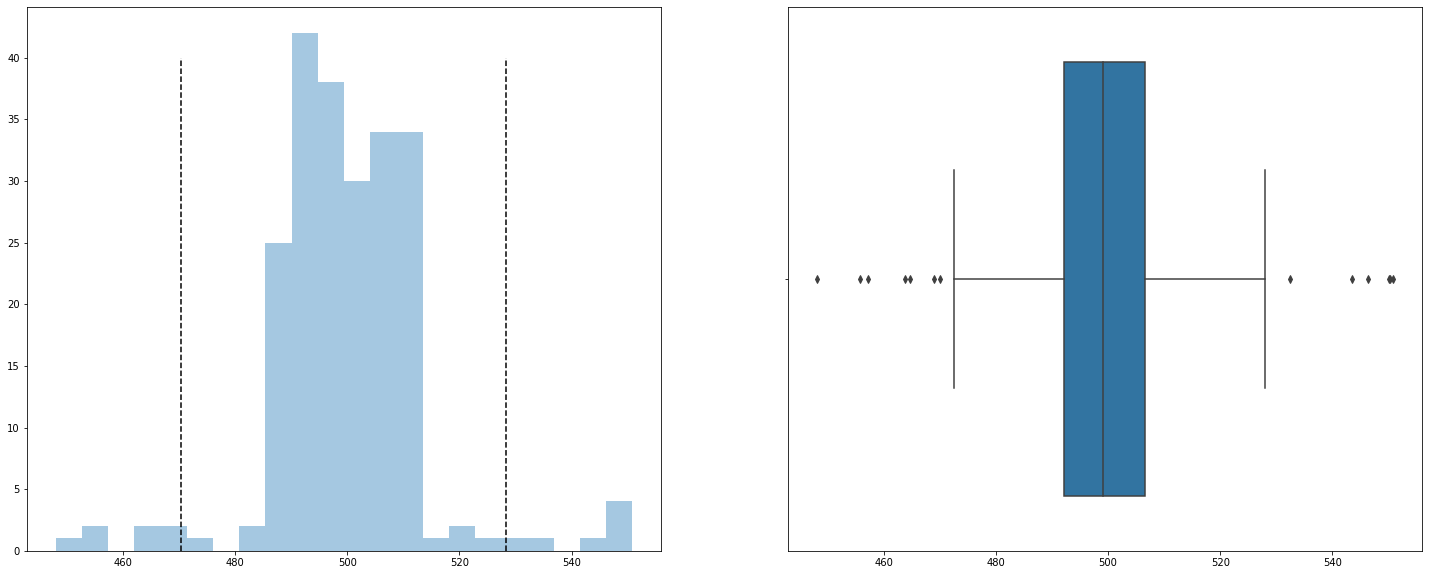

Outliers: 


14     546.321592
22     448.046038
33     468.891185
36     550.291806
69     550.809586
70     469.984712
90     464.623153
99     463.851157
115    543.546922
169    455.715996
191    457.171272
196    532.359599
214    550.110306
dtype: float64

In [20]:
detector.plot_distributions_iqr()
print("Outliers: ")
outliers_using_iqr

In [21]:
outliers_using_zscore = detector.find_outliers_using_zscore(threshold = 3)
outliers_using_zscore

14     546.321592
36     550.291806
69     550.809586
115    543.546922
214    550.110306
dtype: float64